In [112]:
import csv
import numpy as np

In [113]:
id_all, mt_all = [], []    # ID & MT of all cases
mt_avg = {}                # MT grouped and averaged by ID
id_count = {}              # Count how many conditions with the same ID
id_mt = {}                 # ID/MT grouped by ID
id_mt_user_count = {}      # Counter for each user in each ID
tp_by_user = {}            # Throughput of each user in an ID
tp_by_id = {}              # Throughput grouped by ID

csv_path = "data.csv"
with open(csv_path, "rb") as file_obj:
    reader = csv.DictReader(file_obj, delimiter = ',')
    for line in reader:
        '''
        # The columns
        print(line["Study #"]),
        print(line["D (pixels)"]),
        print(line["W (pixels)"]),
        print(line["Try #"]),
        print(float(line["Index of Difficulty"])),
        print(line["Movement Time (ms)"])
        '''
        
        # Grab only what we need
        # We don't convert line_id to float here because mt_avg cannot use a float number as a key
        id = line["Index of Difficulty"]
        mt = float(line["Movement Time (ms)"])
        user = int(line["Study #"])
        
        # Collect them into id_all & mt_all for calculating the regression coefficients
        id_all.append(float(id))
        mt_all.append(mt)
        
        # For calculating averaged MT for each ID
        if id not in mt_avg:
            mt_avg[id] = mt
            id_count[id] = 1
        else:
            mt_avg[id] += mt
            id_count[id] += 1
            
        # For calculating TP
        if id not in id_mt:
            id_mt[id] = {}    # Each ID is also categorized by user
            id_mt[id][user] = float(id) / mt
            id_mt_user_count[id] = {}
            id_mt_user_count[id][user] = 1
        else:
            if line_user not in id_mt[id]:
                id_mt[id][user] = float(id) / mt
                id_mt_user_count[id][user] = 1
            else:
                id_mt[id][user] += float(id) / mt
                id_mt_user_count[id][user] += 1
        
        if id not in tp_by_id:
            tp_by_id[id] = 0
    
    # Averaged MT for each ID
    for _id, total_mt in mt_avg.iteritems():
        mt_avg[_id] /= id_count[_id]
    
    # Throughput
    for _id, users in id_mt.iteritems():
        tp_by_user[_id] = {}
        for _user, _id_mt in id_mt[_id].iteritems():
            # Averaged ID/MT by user in each ID
            tp_by_user[_id][_user] = id_mt[line_id][line_user] / id_mt_user_count[_id][_user]
            tp_by_id[_id] += (tp_by_user[_id][_user] / len(tp_by_user[_id]))
              
    # Convert the lists to numpy arrays for plotting
    id_all = np.array(id_all)
    mt_all = np.array(mt_all)
    mt_avg = np.array([ [float(_id), _mt] for _id, _mt in mt_avg.items() ])
    tp_by_id = np.array([ [float(_id), _tp] for _id, _tp in tp_by_id.items() ])
    
    print("Averaged MT by ID: ")
    print(mt_avg)
    print("Throughput by ID: ")
    print(tp_by_id)

Averaged MT: 
[[    5.17   1311.6  ]
 [    3.087   784.45 ]
 [    4.209  1136.85 ]
 [    3.459   796.2  ]
 [    4.      981.65 ]
 [    4.392   854.2  ]]
Throughput by ID: 
[[ 5.17        0.03593775]
 [ 3.087       0.03593775]
 [ 4.209       0.03593775]
 [ 3.459       0.03593775]
 [ 4.          0.03593775]
 [ 4.392       0.03593775]]


In [114]:
# Regression Coefficients
m, b = np.polyfit(id_all, mt_all, 1)
print(m, b)

(243.00062082355643, -7.3493494277364899)


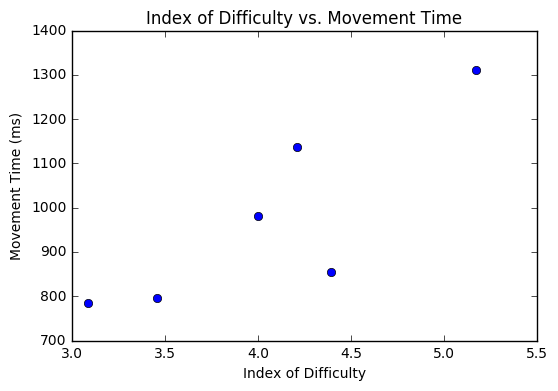

In [115]:
import matplotlib.pyplot as plt

# Index of Difficulty vs. Movement Time
plt.xlabel('Index of Difficulty')
plt.ylabel('Movement Time (ms)')
plt.plot(mt_avg[:, 0], mt_avg[:, 1], "o")
plt.title('Index of Difficulty vs. Movement Time')
plt.show()

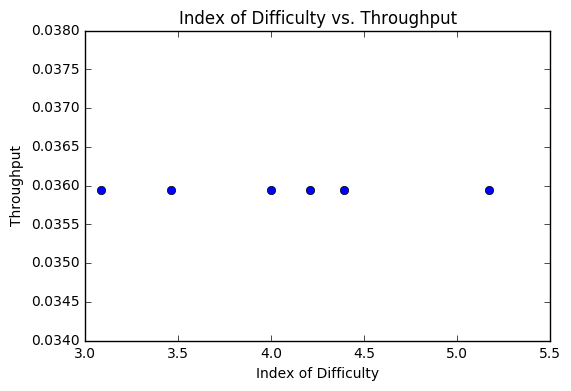

In [116]:
# Index of Difficulty vs. Throughput
plt.xlabel('Index of Difficulty')
plt.ylabel('Throughput')
plt.plot(tp_by_id[:, 0], tp_by_id[:, 1], "o")
plt.title('Index of Difficulty vs. Throughput')
plt.show()